# PROJECT 2 : SENTIMENT ANALYSIS

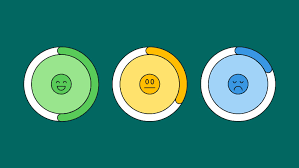

### 1. BUSINESS CASE: To build a text classifier model to classify the sentiment behind the text.

In [1]:
!pip install wordcloud


### 2. IMPORTING THE NECESSARY PYTHON LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df


,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious
...,...,...,...
937849,@Juice_Lemons in the dark. it’s so good,en,positive
937850,8.SSR &amp; Disha Salian case should be solved...,en,negative
937851,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative
937852,@reblavoie So happy for her! She’s been incred...,en,positive


### **Text Processing**

In [4]:
df['Clean'] = df.apply(lambda row: row['Text'].lower(),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub(r"http\S+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub(r"www.\S+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub('[()!?]'," ", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub('\[.*?\]'," ", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Clean']),axis=1)

In [5]:
df.head()

,Text,Language,Label,Clean
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious,testimony is not evidence in a court of la...
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative,como dos gotas de agua joven se disfraza de...
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious,flagstar bank discloses a data breach that im...
3,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda is set to host the headquarters of unit...
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious,oops i typed her name incorrectly today s br...


### Text Visualisation

In [6]:
df['Label'].unique()

array(['litigious', 'negative', 'positive', 'uncertainty'], dtype=object)

In [7]:
df['Label']

0         litigious
1          negative
2         litigious
3          positive
4         litigious
            ...    
937849     positive
937850     negative
937851     negative
937852     positive
937853     negative
Name: Label, Length: 937854, dtype: object

(-0.5, 499.5, 499.5, -0.5)

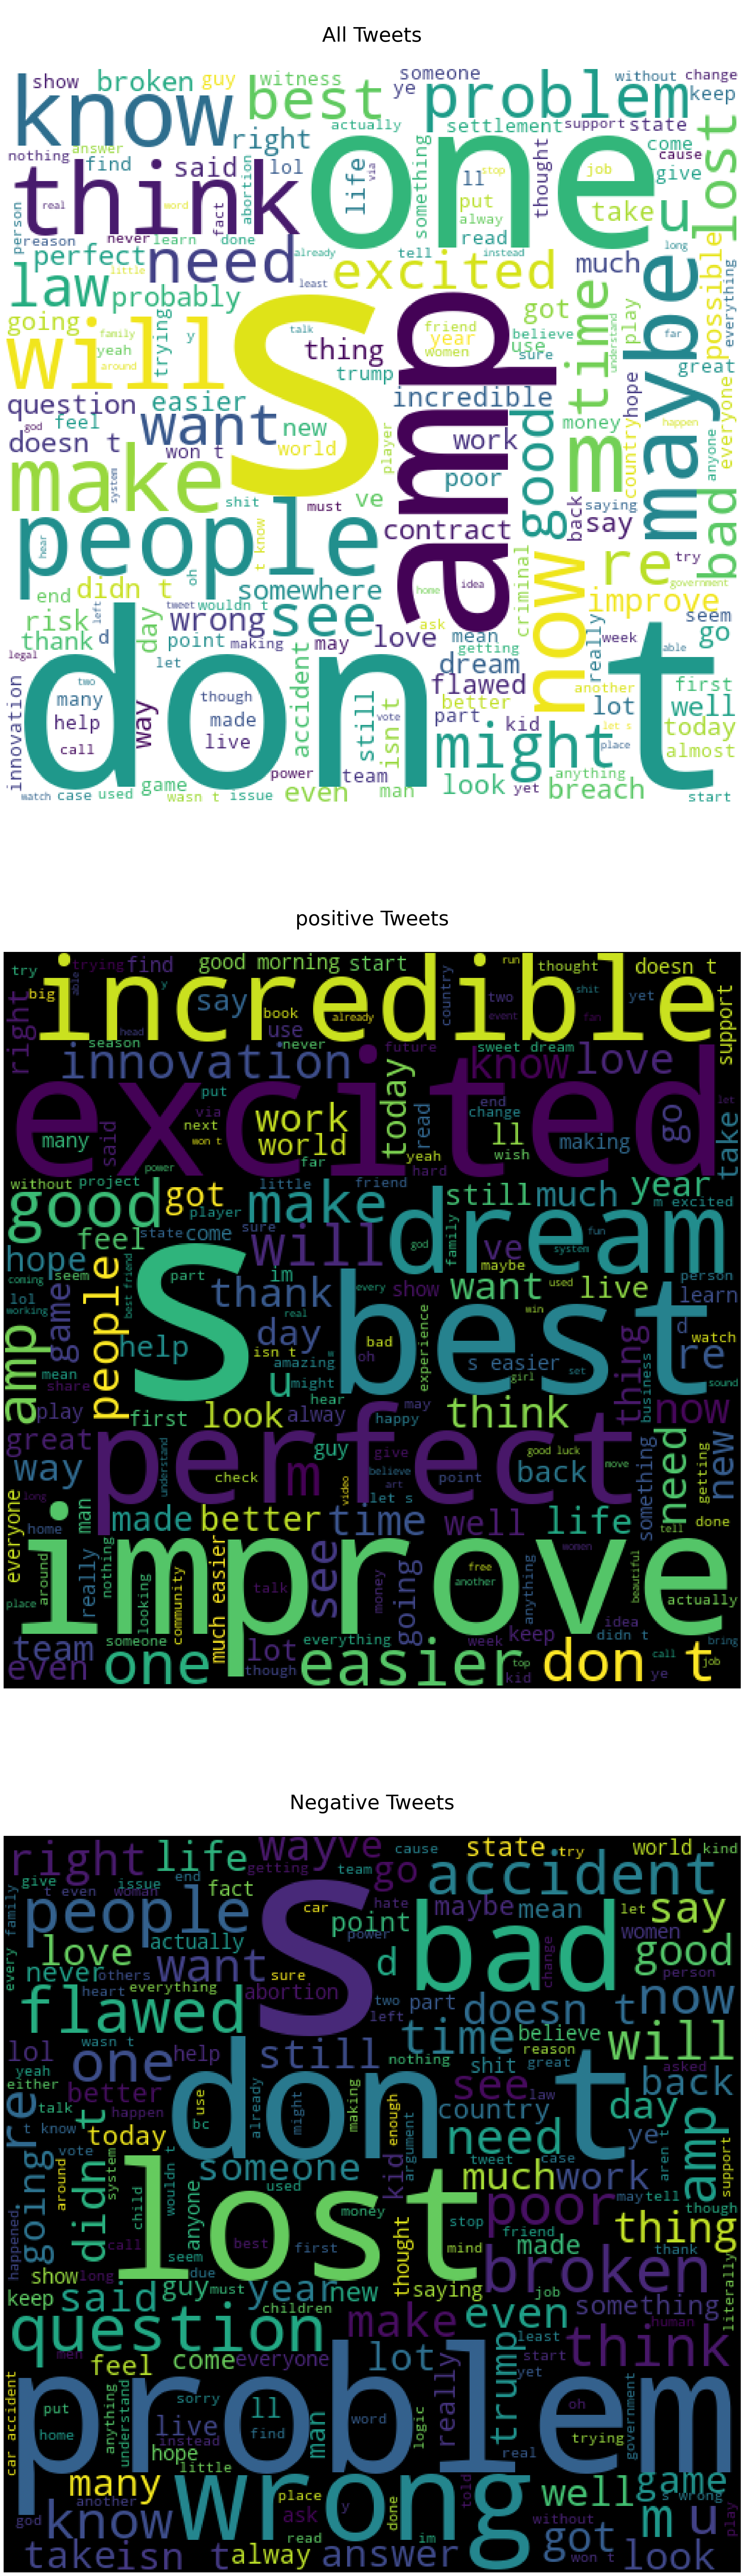

In [8]:
# Wordcloud

fig, ax = plt.subplots(3, 1, figsize  = (90,90))
firstcloud_all = WordCloud(
                          background_color='white',
                          width=500,
                          height=500
                         ).generate(" ".join(df['Clean']))
firstcloud_positive=WordCloud(
                          background_color='black',
                          width=500,
                          height=500
                         ).generate(" ".join(df[df['Label']=='positive']['Clean']))
firstcloud_negative=WordCloud(
                          background_color='black',
                          width=500,
                          height=500
                         ).generate(" ".join(df[df['Label']=='negative']['Clean']))

ax[0].imshow(firstcloud_all )
ax[0].set_title('\nAll Tweets\n', fontsize=40)
ax[0].axis('off')

ax[1].imshow(firstcloud_positive )
ax[1].set_title('\npositive Tweets\n', fontsize=40)
ax[1].axis('off')

ax[2].imshow(firstcloud_negative)
ax[2].set_title('\nNegative Tweets\n',fontsize=40)
ax[2].axis('off')

In [9]:
# labeling 

x = df["Clean"]
y = df["Label"]

**Vectorizer and Logistic Regression**

In [10]:
model = Pipeline((("vect", TfidfVectorizer()),("clc", LogisticRegression(max_iter=600))))
xTrain = x.head(int(50000 * 0.9))
xTest =  x.tail(int(50000 * 0.1))
yTrain = y.head(int(50000*0.9))
yTest =  y.tail(int(50000 * 0.1))
model.fit(xTrain,yTrain)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clc', LogisticRegression(max_iter=600))])

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [14]:
accuracy = (acc(model.predict(xTest), yTest))
print("Accuracy :- ", accuracy)
yPrediction = model.predict(xTest)

Accuracy :-  0.9558


In [15]:
print(model.predict(['you have a bad habbit of eating']))

['negative']


In [16]:
print(model.predict(['you have a bad habbit of eating']))

['negative']
